# Приложение 1. Код для проектной работы. Препроцессинг и лемматизация. Евгений Уланов, АДГО

In [45]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data = pd.read_csv('/content/drive/MyDrive/project_data.csv')
data.head()

,name,region,text,likes,reposts,date
0,Подслушано Охтинский Колледж,г.Санкт-Петебург,НУ И ДА \nПРО ДИПЛОМЫ/КУРСОВЫЕ \nХУЙНЮ ПРО ВОЙ...,66,11,2022-10-09 18:44:59
1,Подслушано Охтинский Колледж,г.Санкт-Петебург,Кто потерял ?случайно вместо своего взяла \nсд...,9,2,2024-03-14 07:39:08
2,Подслушано Охтинский Колледж,г.Санкт-Петебург,"Ищу данную молодую девочку, учиться на Дыбенко...",37,15,2024-03-09 12:35:53
3,Подслушано Охтинский Колледж,г.Санкт-Петебург,"Ищу данного молодого человека, учиться на Дыбе...",20,10,2024-03-07 10:58:58
4,Подслушано Охтинский Колледж,г.Санкт-Петебург,"+1/2 в кс на турик, если был фейсит у вас то ж...",3,0,2024-02-23 09:45:54


In [65]:
data= data[data['lines_processed'] != 'nan']

In [66]:
import re

data['lines_processed'] = data['text'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x))
data['lines_processed'] = data['lines_processed'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
data['lines_processed'] = data['lines_processed'].str.strip()

In [67]:
data.dropna(subset=['lines_processed'], inplace=True)

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem

lem = Mystem()
nltk.download('stopwords')
stop = stopwords.words('russian')

def preprocess_text(x):
    return [word.rstrip() for word in (''.join(lem.lemmatize(x))).split(' ') if (word not in stop and word != '')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
stop.extend([u'я', u'а', u'да', u'но', u'тебе', u'мне', u'ты', u'и', u'у', u'на', u'ща', u'ага', u'так', u'там', u'какие', u'который', u'какая', u'туда', u'давай', u'короче', u'кажется', u'вообще', u'ну', u'не', u'чет', u'неа', u'свои', u'наше', u'наш', u'весь', u'хотя', u'такое', u'например', u'кароч', u'как-то', u'нам', u'хм', u'всем', u'нет', u'да', u'оно', u'своем', u'про', u'вы', u'м', u'тд', u'класс', u'пожалуйста', u'пост', u'свой', u'почему', u'вся', u'кто-то', u'что-то', u'вам', u'это', u'эта', u'эти', u'этот', u'прям', u'либо', u'как', u'мы', u'просто', u'блин', u'очень', u'самые', u'твоем', u'ваша', u'кстати', u'вроде', u'типа', u'пока', u'ок', u'анон', u'анонимно', u'админ', u'ребята', u'ай', u'мочь', u'блин', u'очень', u'самые', u'твоем', u'ваша', u'кстати', u'вроде', u'типа', u'пока', u'ок', 'анон', u'анонимно', u'админ', u'ребята', u'ай', u"школа", u'ваш', u'привет', u'б', u'а', u'год', u'группа',u'день', u'adm', u'спасибо', u'новый',u'хотеть', u'сегодня',  u'участник', u'большой', u'https',u'урок', u'лицей', u'самый',  u'делать', u'писать', u'написать',u'учитель', u'второй',  u'лицей', u'самый',  u'знапт', u'малышев', u'дата',u'левченко', u'антон',  u'находить', u'желать', u'стать',u'хороший', u'человек', u'школа', u'знать', u'школе', u'школу', u'школы', u'любить', u'девочка', u'сказать', u'давать', u'учиться', u'ходить', u'искать', u'сделать', u'думать', u'видеть', u'понимать', u'говорить', u'помогать', u'уходить', u'приходить', u'рассказывать', u'оставаться', u'начинать', u'ждать', u'оставлять', u'спрашивать', u'искать'])


In [94]:
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop]
    return ' '.join(filtered_words)

# Apply the remove_stop_words function to the 'lines_processed' column
data['lines_processed'] = data['lines_processed'].apply(remove_stop_words)

In [95]:
from tqdm import tqdm_notebook
import tqdm.notebook

text_data = data['lines_processed'].to_numpy()

text_data_lemmatized = []
for text in tqdm.notebook.tqdm(text_data):
    text_data_lemmatized.append(preprocess_text(text))

  0%|          | 0/31005 [00:00<?, ?it/s]

In [96]:
data['lines_lemmatized'] = text_data_lemmatized

data.head(10)

,name,region,text,likes,reposts,date,lines_processed,lines_lemmatized
0,Подслушано Охтинский Колледж,г.Санкт-Петебург,НУ И ДА \nПРО ДИПЛОМЫ/КУРСОВЫЕ \nХУЙНЮ ПРО ВОЙ...,66,11,2022-10-09 18:44:59,дипломыкурсовые хуйню войну выкладываем хватит...,"[дипломыкурсовой, хуйня, война, выкладывать, х..."
1,Подслушано Охтинский Колледж,г.Санкт-Петебург,Кто потерял ?случайно вместо своего взяла \nсд...,9,2,2024-03-14 07:39:08,потерял случайно вместо своего взяла сдам охра...,"[потерять, случайно, вместо, взять, сдавать, о..."
2,Подслушано Охтинский Колледж,г.Санкт-Петебург,"Ищу данную молодую девочку, учиться на Дыбенко...",37,15,2024-03-09 12:35:53,ищу данную молодую девочку дыбенкорасскажите з...,"[данный, молодой, дыбенкорассказать, заарканив..."
3,Подслушано Охтинский Колледж,г.Санкт-Петебург,"Ищу данного молодого человека, учиться на Дыбе...",20,10,2024-03-07 10:58:58,ищу данного молодого человека дыбенкорасскажит...,"[данный, молодой, дыбенкорассказать, он]"
4,Подслушано Охтинский Колледж,г.Санкт-Петебург,"+1/2 в кс на турик, если был фейсит у вас то ж...",3,0,2024-02-23 09:45:54,12 кс турик фейсит желательно 6 лвл выше рейти...,"[12, кс, турик, фейсить, желательно, 6, лвл, в..."
5,Подслушано Охтинский Колледж,г.Санкт-Петебург,"вот такой шикарный вид открывается на респе, м...",33,1,2024-02-22 14:17:07,шикарный вид открывается респе мужик решил пос...,"[шикарный, вид, открываться, респ, мужик, реша..."
6,Подслушано Охтинский Колледж,г.Санкт-Петебург,Ребят нужен челик на 2 поз для турика от шараг...,6,9,2024-02-21 11:51:13,ребят нужен челик 2 поз турика шараги доте жел...,"[нужный, челик, 2, поза, турик, шарага, дот, ж..."
7,Подслушано Охтинский Колледж,г.Санкт-Петебург,"Ищу девушку, проследил за ней от колледжа до м...",18,7,2024-02-17 11:21:30,ищу девушку проследил колледжа метро помогите ...,"[девушка, прослеживать, колледж, метро, понрав..."
8,Подслушано Охтинский Колледж,г.Санкт-Петебург,"анонимно/ тяночки из бухарестской, отзовитесь,...",9,1,2024-02-16 05:28:44,тяночки бухарестской отзовитесь дайте контакты...,"[тяночка, бухарестский, отзываться, контакт, к..."
9,Подслушано Охтинский Колледж,г.Санкт-Петебург,Артур Кузнецов ты нашёл себе женщину? давно п...,14,2,2024-02-16 03:59:04,артур кузнецов нашёл женщину давно постов поис...,"[артур, кузнецов, женщина, давно, поиск, женщи..."


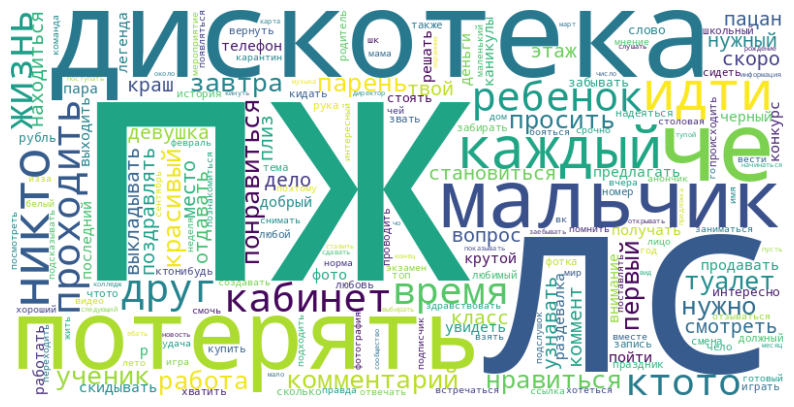

In [97]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = ' '.join(' '.join(line) for line in data['lines_lemmatized'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [98]:
data.to_pickle('/content/drive/MyDrive/JavaScript/stopwords_extended.pkl')